### Q1: Importing, understanding and cleaning data

In [117]:
# Load the libraries 

import re
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', '{:.0f}'.format)

#### 1.Title_basic.tsv


In [118]:
# Define a function to load data with a specified range and replace "\N" with NaN values
def loading_data(file_path, start_row=0, end_row=200000, delimiter=','):
    return pd.read_csv(file_path, skiprows=range(1, start_row), nrows=end_row, delimiter=delimiter, na_values='\\N')

file_path = "title.basics.tsv"
start_row = 0
end_row = 250000 #set the number of rows to read or set to None for all the rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_basics = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_basics.shape)
data_title_basics.head(6)


(250000, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1,Short


In [119]:
# Drop duplicate rows
data_title_basics = data_title_basics.drop_duplicates()
data_title_basics.shape

(250000, 9)

In [120]:
# Split the 'genres' column into lists of string values
data_title_basics['genres'] = data_title_basics['genres'].str.split(',')

# Explode the 'genres' column to multiple rows
data_title_basics = data_title_basics.explode('genres')

# Display the modified DataFrame with 'genres' column exploded
data_title_basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,Documentary
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,Short
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,Animation
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,Short
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,Animation


In [121]:
#Check for total Nulls

data_title_basics.isnull().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear            439
endYear           404748
runtimeMinutes     81460
genres             26260
dtype: int64

In [122]:
# We will drop End year  if we dont need it

data_title_basics.drop(columns=['endYear'], inplace=True)


In [123]:
#Also drop originalTitle since we have primaryTitle
data_title_basics.drop(columns=['originalTitle'], inplace=True)

In [124]:
#Sanity check
data_title_basics.head(10)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,0,1894,1,Documentary
0,tt0000001,short,Carmencita,0,1894,1,Short
1,tt0000002,short,Le clown et ses chiens,0,1892,5,Animation
1,tt0000002,short,Le clown et ses chiens,0,1892,5,Short
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Animation
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Comedy
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Romance
3,tt0000004,short,Un bon bock,0,1892,12,Animation
3,tt0000004,short,Un bon bock,0,1892,12,Short
4,tt0000005,short,Blacksmith Scene,0,1893,1,Comedy


In [125]:
#drop samples without primary Title
data_title_basics.dropna(subset=['primaryTitle'], inplace=True)
data_title_basics.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear           439
runtimeMinutes    81460
genres            26260
dtype: int64

In [126]:
#Since we have only one null in 'is Adult' we will drop it

# Drop rows where 'isAdult' column is null
data_title_basics.dropna(subset=['isAdult'], inplace=True)

In [127]:
# Replace null values in 'genre' column with 'Adult' for rows where 'isAdult' is equal to 1

data_title_basics.loc[(data_title_basics['isAdult'] == 1) & (data_title_basics['genres'].isnull()), 'genres'] = 'Adult'

#sanity
data_title_basics.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear           439
runtimeMinutes    81460
genres            25477
dtype: int64

In [128]:
data_title_basics.head(40)

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,0,1894,1,Documentary
0,tt0000001,short,Carmencita,0,1894,1,Short
1,tt0000002,short,Le clown et ses chiens,0,1892,5,Animation
1,tt0000002,short,Le clown et ses chiens,0,1892,5,Short
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Animation
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Comedy
2,tt0000003,short,Pauvre Pierrot,0,1892,4,Romance
3,tt0000004,short,Un bon bock,0,1892,12,Animation
3,tt0000004,short,Un bon bock,0,1892,12,Short
4,tt0000005,short,Blacksmith Scene,0,1893,1,Comedy


In [129]:
# We notice that start year is increasing gradually as with the index so to fill the Null values we will use the previous row value

# Replace null values in 'startyear' column with previous row's value
data_title_basics['startYear'].fillna(method='ffill', inplace=True)
data_title_basics.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear             0
runtimeMinutes    81460
genres            25477
dtype: int64

In [130]:
# Convert 'startYear' column to integer type
data_title_basics['startYear'] = data_title_basics['startYear'].astype(int)

In [131]:
data_title_basics['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [132]:
# For Short movies with null values, fill them with the average runtime of other short films
# Calculate the mean runtime value for short films excluding NaN values and non-numeric values
mean_short_runtime = data_title_basics[data_title_basics['titleType'] == 'short']['runtimeMinutes'].dropna().astype(float).mean()

# Fill NaN values in 'runtimeMinutes' column for short films with the calculated mean runtime value
data_title_basics.loc[(data_title_basics['titleType'] == 'short') & (data_title_basics['runtimeMinutes'].isnull()), 'runtimeMinutes'] = mean_short_runtime

data_title_basics.isna().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear             0
runtimeMinutes    50659
genres            25477
dtype: int64

In [133]:
#  Sanity 
# Compute the percentage of null values in each column
data_title_basics.isnull().sum() / len(data_title_basics) * 100


tconst            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes   12
genres            6
dtype: float64

In [134]:
#since only 2% from genres of total set is null we will drop them

data_title_basics= data_title_basics.dropna(subset=['genres'])

In [135]:
#  Sanity 
# Compute the percentage of null values in each column
data_title_basics.isnull().sum() / len(data_title_basics) * 100


tconst           0
titleType        0
primaryTitle     0
isAdult          0
startYear        0
runtimeMinutes   8
genres           0
dtype: float64

In [136]:
data_title_basics.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear             0
runtimeMinutes    33238
genres                0
dtype: int64

In [137]:
# Convert 'runtimeMinutes' to float. Errors is set to 'coerce'so that any values that cannot be converted to numeric will be replaced with NaN.
data_title_basics['runtimeMinutes'] = pd.to_numeric(data_title_basics['runtimeMinutes'], errors='coerce')

data_title_basics.isnull().sum()

tconst                0
titleType             0
primaryTitle          0
isAdult               0
startYear             0
runtimeMinutes    33238
genres                0
dtype: int64

In [138]:
# Filter out rows where 'runtimeMinutes' is not NaN to calculate mean runtimes
data_title_basics_filtered = data_title_basics.dropna(subset=['runtimeMinutes'])

# Calculate the mean runtime for each combination of 'titleType', 'startYear', and 'genres'
mean_runtimes = data_title_basics_filtered.groupby(['titleType', 'startYear', 'genres'])['runtimeMinutes'].mean().reset_index()

# Merge mean runtimes back to the original DataFrame
data_title_basics = data_title_basics.merge(mean_runtimes, on=['titleType', 'startYear', 'genres'], how='left', suffixes=('', '_mean'))

# Fill NaN values in 'runtimeMinutes' with the mean runtime for each combination
data_title_basics['runtimeMinutes'] = data_title_basics['runtimeMinutes'].fillna(data_title_basics['runtimeMinutes_mean'])

# Drop the redundant columns
data_title_basics.drop(columns=['runtimeMinutes_mean'], inplace=True)


In [139]:
data_title_basics.isna().sum()

tconst               0
titleType            0
primaryTitle         0
isAdult              0
startYear            0
runtimeMinutes    1491
genres               0
dtype: int64

In [140]:
# Fill NaN values in 'runtimeMinutes' with the mean runtime for each combination of 'titleType' and 'genres'
data_title_basics['runtimeMinutes'] = data_title_basics['runtimeMinutes'].fillna(data_title_basics.groupby(['titleType', 'genres'])['runtimeMinutes'].transform('mean'))

data_title_basics.isna().sum()

tconst              0
titleType           0
primaryTitle        0
isAdult             0
startYear           0
runtimeMinutes    267
genres              0
dtype: int64

In [141]:
# Fill NaN values in 'runtimeMinutes' with the mean runtime for each genre
data_title_basics['runtimeMinutes'] = data_title_basics['runtimeMinutes'].fillna(data_title_basics.groupby('genres')['runtimeMinutes'].transform('mean'))

data_title_basics.isna().sum()

tconst            0
titleType         0
primaryTitle      0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [142]:
# use the start year to create a new column  based on the binned values

# Create bins for decades
decade_bins = [i for i in range(1850, 2024, 10)]

# Create labels for each decade
decade_labels = [f"{decade}-{decade+9}" for decade in decade_bins[:-1]]

# Add a new column to the DataFrame indicating the decade
data_title_basics['Decade'] = pd.cut(data_title_basics['startYear'], bins=decade_bins, labels=decade_labels, right=False)

# Example usage:
data_title_basics.head(20)


,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade
0,tt0000001,short,Carmencita,0,1894,1,Documentary,1890-1899
1,tt0000001,short,Carmencita,0,1894,1,Short,1890-1899
2,tt0000002,short,Le clown et ses chiens,0,1892,5,Animation,1890-1899
3,tt0000002,short,Le clown et ses chiens,0,1892,5,Short,1890-1899
4,tt0000003,short,Pauvre Pierrot,0,1892,4,Animation,1890-1899
5,tt0000003,short,Pauvre Pierrot,0,1892,4,Comedy,1890-1899
6,tt0000003,short,Pauvre Pierrot,0,1892,4,Romance,1890-1899
7,tt0000004,short,Un bon bock,0,1892,12,Animation,1890-1899
8,tt0000004,short,Un bon bock,0,1892,12,Short,1890-1899
9,tt0000005,short,Blacksmith Scene,0,1893,1,Comedy,1890-1899


#### 2.Title_crew.tsv

In [143]:
## Repeat the process
# Set the parameters for the previously defined function

file_path = "title.crew.tsv"
start_row =0
end_row = 50000  # For the first 20k rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_crew = loading_data(file_path, start_row, end_row, delimiter)
print(data_crew.shape)
data_crew.head(10)


(50000, 3)


,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN
5,tt0000006,nm0005690,NaN
6,tt0000007,"nm0005690,nm0374658",NaN
7,tt0000008,nm0005690,NaN
8,tt0000009,nm0085156,nm0085156
9,tt0000010,nm0525910,NaN


In [144]:
# Drop duplicate rows
data_crew = data_crew.drop_duplicates()
print(data_crew.shape)
    

(50000, 3)


In [145]:
#Check for total Nulls

data_crew.isnull().sum() / len(data_crew) * 100


tconst       0
directors    3
writers     13
dtype: float64

In [146]:
# Drop rows where both 'directors' and 'writers' columns are null
data_crew.dropna(subset=['directors', 'writers'], how='all', inplace=True)
data_crew.isnull().sum() / len(data_crew) * 100

tconst       0
directors    1
writers     11
dtype: float64

In [147]:
#Although it might not be the best tactic

# Fill null values in 'writers' column with values from 'directors' column
data_crew['writers'] = data_crew['writers'].fillna(data_crew['directors'])

# Fill null values in 'directors' column with values from 'writers' column
data_crew['directors'] = data_crew['directors'].fillna(data_crew['writers'])

#Sanity
data_crew.isna().sum()

tconst       0
directors    0
writers      0
dtype: int64

In [148]:
# Split the 'directors' column by ',' and explode it to multiple rows
data_crew['directors'] = data_crew['directors'].str.split(',')
data_crew = data_crew.explode('directors')

# Split the 'writers' column by ',' and explode it to multiple rows
data_crew['writers'] = data_crew['writers'].str.split(',')
data_crew = data_crew.explode('writers')

#sanity
data_crew.head(40)

,tconst,directors,writers
0,tt0000001,nm0005690,nm0005690
1,tt0000002,nm0721526,nm0721526
2,tt0000003,nm0721526,nm0721526
3,tt0000004,nm0721526,nm0721526
4,tt0000005,nm0005690,nm0005690
5,tt0000006,nm0005690,nm0005690
6,tt0000007,nm0005690,nm0005690
6,tt0000007,nm0005690,nm0374658
6,tt0000007,nm0374658,nm0005690
6,tt0000007,nm0374658,nm0374658


#### 3.Name_basic.tsv

In [149]:
# Set the parameters for the previously defined function

file_path = "name.basics.tsv"
start_row = 0
end_row = 50000  # For the first 20k rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_name_basics = loading_data(file_path, start_row, end_row, delimiter)
print(data_name_basics.shape)
data_name_basics.head(50)


(50000, 6)


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0042593,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0035575"


In [150]:
# Drop duplicate rows
data_name_basics = data_name_basics.drop_duplicates()
print(data_name_basics.shape)


(50000, 6)


In [151]:
data_name_basics.isnull().sum()


nconst                   0
primaryName              0
birthYear            32295
deathYear            41811
primaryProfession      895
knownForTitles         970
dtype: int64

In [152]:
#Drop cases with missing primaryName

data_name_basics.dropna(subset=['primaryName'], inplace=True)
data_name_basics.isnull().sum()

nconst                   0
primaryName              0
birthYear            32295
deathYear            41811
primaryProfession      895
knownForTitles         970
dtype: int64

In [153]:
# Drop 'birthYear' and 'deathYear' columns
data_name_basics.drop(columns=['birthYear', 'deathYear'], inplace=True)
data_name_basics.isnull().sum()

nconst                 0
primaryName            0
primaryProfession    895
knownForTitles       970
dtype: int64

In [154]:
data_name_basics.tail(60)

,nconst,primaryName,primaryProfession,knownForTitles
49940,nm0052327,Dilip Bannerjee,"camera_department,production_manager,miscellan...","tt0239495,tt1587289,tt0170416,tt0237499"
49941,nm0052328,Durgadas Bannerjee,actor,"tt0242629,tt0022752,tt0028626,tt0154715"
49942,nm0052329,Haradhan Bannerjee,"actor,soundtrack","tt2082197,tt0059348,tt0072190,tt1392889"
49943,nm0052330,Jiten Bannerjee,"cinematographer,director","tt0369699,tt0248777,tt0259535,tt0154747"
49944,nm0052331,Jyotish Bannerjee,director,"tt0154718,tt0154839,tt0155163,tt0154854"
49945,nm0052332,Kali Bannerjee,actor,"tt0055508,tt1527071,tt1538394,tt0048956"
49946,nm0052333,Kanu Bannerjee,"actor,archive_footage","tt0048473,tt0048956,tt0156366,tt0231824"
49947,nm0052334,Karuna Bannerjee,"actress,archive_footage","tt0048956,tt0048473,tt0234168,tt0056134"
49948,nm0052335,Makhanlal Bannerjee,actor,tt0265723
49949,nm0052337,Nirmal Bannerjee,actor,"tt0156845,tt28631126,tt0026530,tt0156069"


In [155]:
#After searching some of the names with null primary profession in most cases they either portray themselves or host
#We will fill the nulls with 'Self' although for some cases it might not be correct

data_name_basics['primaryProfession'] = data_name_basics['primaryProfession'].fillna('Self')
data_name_basics.isnull().sum()

nconst                 0
primaryName            0
primaryProfession      0
knownForTitles       970
dtype: int64

In [156]:
#For knownForTitles we will replace it with unknown

data_name_basics['knownForTitles'] = data_name_basics['knownForTitles'].fillna('tt_unknown')
data_name_basics.isna().sum()

nconst               0
primaryName          0
primaryProfession    0
knownForTitles       0
dtype: int64

In [157]:
# Split the 'primaryProfession' column into lists of string values
data_name_basics['primaryProfession'] = data_name_basics['primaryProfession'].str.split(',')

# Explode the 'genres' column to multiple rows
data_name_basics = data_name_basics.explode('primaryProfession')

# Display the modified DataFrame with 'genres' column exploded
data_name_basics.head()

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,actor,"tt0072308,tt0050419,tt0053137,tt0027125"
0,nm0000001,Fred Astaire,miscellaneous,"tt0072308,tt0050419,tt0053137,tt0027125"
0,nm0000001,Fred Astaire,producer,"tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,actress,"tt0037382,tt0075213,tt0117057,tt0038355"
1,nm0000002,Lauren Bacall,soundtrack,"tt0037382,tt0075213,tt0117057,tt0038355"


In [158]:
# Split the 'knownForTitles' column into lists of string values
data_name_basics['knownForTitles'] = data_name_basics['knownForTitles'].str.split(',')

# Explode the 'genres' column to multiple rows
data_name_basics = data_name_basics.explode('knownForTitles')

# Display the modified DataFrame with 'genres' column exploded
data_name_basics.head()

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,actor,tt0072308
0,nm0000001,Fred Astaire,actor,tt0050419
0,nm0000001,Fred Astaire,actor,tt0053137
0,nm0000001,Fred Astaire,actor,tt0027125
0,nm0000001,Fred Astaire,miscellaneous,tt0072308


#### 4. title_principals.tsv

In [159]:
# Set the parameters for the previously defined function

file_path = "title.principals.tsv"
start_row = 0
end_row = 250000  # number of end line , if set None loads all
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_principals = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_principals.shape)
data_title_principals.head(10)

(250000, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN
5,tt0000002,2,nm1335271,composer,NaN,NaN
6,tt0000003,1,nm0721526,director,NaN,NaN
7,tt0000003,2,nm1770680,producer,producer,NaN
8,tt0000003,3,nm0721526,producer,producer,NaN
9,tt0000003,4,nm1335271,composer,NaN,NaN


In [160]:
# Drop duplicate rows
data_title_principals = data_title_principals.drop_duplicates()
print(data_title_principals.shape)

(250000, 6)


In [161]:
data_title_principals.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN
5,tt0000002,2,nm1335271,composer,NaN,NaN
6,tt0000003,1,nm0721526,director,NaN,NaN
7,tt0000003,2,nm1770680,producer,producer,NaN
8,tt0000003,3,nm0721526,producer,producer,NaN
9,tt0000003,4,nm1335271,composer,NaN,NaN


In [162]:
#Check for uniques in 'category'
data_title_principals['category'].unique()

array(['self', 'director', 'producer', 'cinematographer', 'composer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'casting_director'], dtype=object)

In [163]:
#Check for uniques in 'job'

data_title_principals['job'].unique()

array([nan, 'producer', 'director of photography', ...,
       'play "Canción de cuna"',
       'play "Der Fall Grootman/The Grootman Case"', 'book by'],
      dtype=object)

In [164]:
data_title_principals.isnull().sum()

tconst             0
ordering           0
nconst             0
category           0
job           202965
characters    109825
dtype: int64

In [165]:
# Fill 'job' nulls with corresponding non-null 'category' values
data_title_principals['job'] = data_title_principals['job'].fillna(data_title_principals['category'])

data_title_principals.isnull().sum()

tconst             0
ordering           0
nconst             0
category           0
job                0
characters    109825
dtype: int64

In [166]:
# Groupby 'category' column and count null values in 'characters' column

data_title_principals.groupby('category')['characters'].apply(lambda x: x.isna().sum())

category
actor                  12097
actress                 6146
archive_footage            7
casting_director          52
cinematographer        16508
composer                2194
director               23281
editor                  4429
producer                9357
production_designer      637
self                       0
writer                 35117
Name: characters, dtype: int64

In [167]:
# For 'actress' category, fill nulls in 'characters' column with 'unknown role'
data_title_principals.loc[data_title_principals['category'] == 'actress', 'characters'] = \
    data_title_principals.loc[data_title_principals['category'] == 'actress', 'characters'].fillna('unknown role')

# For 'actor' category, fill nulls in 'characters' column with 'unknown role'
data_title_principals.loc[data_title_principals['category'] == 'actor', 'characters'] = \
    data_title_principals.loc[data_title_principals['category'] == 'actor', 'characters'].fillna('unknown role')

# For other categories, fill nulls in 'characters' column with 'not acting'
data_title_principals['characters'] = data_title_principals['characters'].fillna('not acting')

#sanity check
data_title_principals.isnull().sum()

tconst        0
ordering      0
nconst        0
category      0
job           0
characters    0
dtype: int64

In [168]:
data_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,self,"[""Self""]"
1,tt0000001,2,nm0005690,director,director,not acting
2,tt0000001,3,nm0005690,producer,producer,not acting
3,tt0000001,4,nm0374658,cinematographer,director of photography,not acting
4,tt0000002,1,nm0721526,director,director,not acting


#### 5.title_akas.tsv

In [169]:
# Set the parameters for the previously defined function

file_path = "title.akas.tsv"
start_row = 0
end_row = 400000 # For the first 20k rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_akas = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_akas.shape)
data_title_akas.head(6)


(400000, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,NaN,NaN,original,NaN,1
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita,US,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0
5,tt0000001,6,Карменсита,RU,NaN,imdbDisplay,NaN,0


In [170]:
# Change titleId to tconst
data_title_akas.rename(columns={'titleId': 'tconst'}, inplace=True)


In [171]:
# Drop duplicate rows
data_title_akas = data_title_akas.drop_duplicates()
print(data_name_basics.shape)
data_title_akas.head(60)

(306869, 4)


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,NaN,NaN,original,NaN,1
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita,US,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0
5,tt0000001,6,Карменсита,RU,NaN,imdbDisplay,NaN,0
6,tt0000001,7,Карменсіта,UA,NaN,imdbDisplay,NaN,0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,NaN,0
8,tt0000002,1,Le clown et ses chiens,NaN,NaN,original,NaN,1
9,tt0000002,2,A bohóc és kutyái,HU,NaN,imdbDisplay,NaN,0


In [172]:
# Drop the 'Original Title' 
data_title_akas.drop(columns='isOriginalTitle', inplace=True)

#Sanity
print(data_title_akas.shape)


(400000, 7)


In [173]:
data_title_akas.isna().sum()

tconst             0
ordering           0
title              0
region         57973
language      338606
types          80592
attributes    373634
dtype: int64

In [174]:
#drop samples with null title 

data_title_akas.dropna(subset=['title'], inplace=True)


In [175]:
# Drop features types and attributes

data_title_akas.drop(columns=['types', 'attributes'], inplace=True)


In [176]:
print(data_title_akas.shape)
data_title_akas.head()


(400000, 5)


,tconst,ordering,title,region,language
0,tt0000001,1,Carmencita,NaN,NaN
1,tt0000001,2,Carmencita,DE,NaN
2,tt0000001,3,Carmencita,US,NaN
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN
4,tt0000001,5,Καρμενσίτα,GR,NaN


In [177]:
#Try to cross fill nulls for language and region

# Fill null values in 'language' column with values from 'region' column
data_title_akas['language'] = data_title_akas['language'].fillna(data_title_akas['region'])

# Fill remaining null values in 'region' column with values from 'language' column
data_title_akas['region'] = data_title_akas['region'].fillna(data_title_akas['language'])

print(data_title_akas.shape)
data_title_akas.isna().sum()

(400000, 5)


tconst          0
ordering        0
title           0
region      57973
language    57973
dtype: int64

In [178]:
# Identify rows where both 'language' and 'region' are null
(data_title_akas['language'].isnull() & data_title_akas['region'].isnull()).sum()


57973

In [179]:
#Since the cases are the same and we cant identify either the country or the language we drop these rows
data_title_akas.dropna(subset=['language', 'region'], inplace=True)
print(data_title_akas.shape)
data_title_akas.isna().sum()

(342027, 5)


tconst      0
ordering    0
title       0
region      0
language    0
dtype: int64

#### 6.Title Ratings

In [180]:
# Set the parameters for the previously defined function


file_path = "title.ratings.tsv"
start_row = 0
end_row = 50000  # For the first 20k rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_ratings = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_ratings.shape)
data_title_ratings.head(10)


(50000, 3)


,tconst,averageRating,numVotes
0,tt0000001,6,2036
1,tt0000002,6,272
2,tt0000003,6,1983
3,tt0000004,5,178
4,tt0000005,6,2741
5,tt0000006,5,183
6,tt0000007,5,852
7,tt0000008,5,2180
8,tt0000009,5,209
9,tt0000010,7,7495


In [181]:
data_title_ratings.describe()

,averageRating,numVotes
count,50000,50000
mean,6,1616
std,1,17832
min,1,5
25%,6,34
50%,6,114
75%,7,446
max,10,1999823


In [182]:
#check the data types
data_title_ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [183]:
# Drop duplicate rows
data_title_ratings = data_title_ratings.drop_duplicates()
print(data_title_ratings.shape)

(50000, 3)


In [184]:
#Check for nulls 

data_title_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

#### 7.Title Episode

In [185]:
# Set the parameters for the previously defined function

file_path = "title.episode.tsv"
start_row = 0
end_row = 50000
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_episode = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_episode.shape)
data_title_episode.head(11)

(50000, 4)


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
6,tt0043710,tt0989125,3,3
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
9,tt0044901,tt0989125,3,46


In [186]:
#Sanity
print(data_title_episode.shape)
data_title_episode.head(60)


(50000, 4)


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
6,tt0043710,tt0989125,3,3
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
9,tt0044901,tt0989125,3,46


In [187]:
# Drop Duplicates if any
data_title_episode = data_title_episode.drop_duplicates()
print(data_title_episode.shape)
data_title_episode.head(60)

(50000, 4)


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
6,tt0043710,tt0989125,3,3
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
9,tt0044901,tt0989125,3,46


In [188]:
data_title_episode.isna().sum()

tconst              0
parentTconst        0
seasonNumber     8304
episodeNumber    8304
dtype: int64

In [189]:
#try checking by parentTconst and sorting 

data_title_episode[data_title_episode['parentTconst'] == 'tt0989125'].sort_values(by=['seasonNumber', 'episodeNumber'])

,tconst,parentTconst,seasonNumber,episodeNumber
2473,tt0125566,tt0989125,1,3
1,tt0042816,tt0989125,1,17
5923,tt0294267,tt0989125,1,24
11306,tt0479629,tt0989125,1,31
5,tt0043693,tt0989125,2,8
4,tt0043631,tt0989125,2,16
11307,tt0479632,tt0989125,2,32
6979,tt0336351,tt0989125,2,48
6,tt0043710,tt0989125,3,3
5104,tt0264183,tt0989125,3,5


In [190]:
# Fill missing 'episodeNumber' values with the previous non-null value within the same 'parentTconst' group
data_title_episode['episodeNumber'] = data_title_episode.groupby('parentTconst')['episodeNumber'].ffill() + 1

# Fill missing 'seasonNumber' values based on changes in the 'episodeNumber' column within the same 'parentTconst' group
data_title_episode['seasonNumber'] = data_title_episode.groupby('parentTconst')['seasonNumber'].ffill()

#Sanity Check
data_title_episode.isna().sum()


tconst              0
parentTconst        0
seasonNumber     5921
episodeNumber    5921
dtype: int64

In [191]:
# Check if there are any null values with the same 'parentTconst' as non-null values for 'episodeNumber' or 'seasonNumber'
data_title_episode.groupby('parentTconst')[['episodeNumber', 'seasonNumber']].apply(lambda group: group.isnull().any()).loc[lambda x: x.any(axis=1)]


,episodeNumber,seasonNumber
parentTconst,,
tt0041002,True,True
tt0041014,True,True
tt0043174,True,True
tt0045373,True,True
tt0047701,True,True
...,...,...
tt8754686,True,True
tt9006468,True,True
tt9179266,True,True


In [192]:
# Fill missing 'episodeNumber' values with the next non-null value within the same 'parentTconst' group
data_title_episode['episodeNumber'] = data_title_episode.groupby('parentTconst')['episodeNumber'].bfill() + 1

# Fill missing 'seasonNumber' values based on changes in the 'episodeNumber' column within the same 'parentTconst' group
data_title_episode['seasonNumber'] = data_title_episode.groupby('parentTconst')['seasonNumber'].bfill()

#Sanity Check
data_title_episode.isna().sum()


tconst              0
parentTconst        0
seasonNumber     5718
episodeNumber    5718
dtype: int64

In [193]:
#Check if the nulls remaning have unique 'parentTconst' 
# Get the remaining null values for 'episodeNumber' and 'seasonNumber'
remaining_nulls = data_title_episode[data_title_episode['episodeNumber'].isna() | data_title_episode['seasonNumber'].isna()]

# Get the non-null values for 'episodeNumber' and 'seasonNumber'
non_nulls = data_title_episode.dropna(subset=['episodeNumber', 'seasonNumber'])

# Find the unique 'parentTconst' values for both null and non-null values
unique_parentTconst_nulls = set(remaining_nulls['parentTconst'])
unique_parentTconst_non_nulls = set(non_nulls['parentTconst'])

# Check if the unique 'parentTconst' values for nulls are disjoint from those for non-nulls
if unique_parentTconst_nulls.isdisjoint(unique_parentTconst_non_nulls):
    print("The remaining nulls have unique 'parentTconst' values compared to the rest of the DataFrame.")
else:
    print("The remaining nulls do not have unique 'parentTconst' values compared to the rest of the DataFrame.")


The remaining nulls have unique 'parentTconst' values compared to the rest of the DataFrame.


In [194]:
#Since all the nulls dont have a parentTconst associated with the non-nulls :

# Set 'seasonNumber' to 1 for null values
data_title_episode.loc[data_title_episode['seasonNumber'].isna(), 'seasonNumber'] = 1

# Group the DataFrame by 'parentTconst' and assign 'episodeNumber' starting from 1 and incrementing by 1
data_title_episode['episodeNumber'] = data_title_episode.groupby('parentTconst').cumcount() + 1

# Convert 'episodeNumber' to integer type
data_title_episode['episodeNumber'] = data_title_episode['episodeNumber'].astype(int)

#sanity check
data_title_episode.isna().sum()

tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
dtype: int64

### Q3: Merging tables

In [195]:
data_name_basics.head()

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,actor,tt0072308
0,nm0000001,Fred Astaire,actor,tt0050419
0,nm0000001,Fred Astaire,actor,tt0053137
0,nm0000001,Fred Astaire,actor,tt0027125
0,nm0000001,Fred Astaire,miscellaneous,tt0072308


In [196]:
#we can merge data_title_basics , data_title_ratings , and data_name_basics,data_title_akas and data_title_episode
#we are going to use inner merge for all merges to avoid having null values 

#Firstly,we are going to merge data_title_basics and data_names_basic,left_on='knownForTitles',right_on="parentTconst"
data_merged = data_title_basics.merge(data_name_basics, left_on='tconst', right_on='knownForTitles', how='inner')

#After merge we keep only 'knownForTitles' column
data_merged.drop(columns=['tconst'], inplace=True)
print(data_merged.shape)
data_merged.head()



(392405, 11)


,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade,nconst,primaryName,primaryProfession,knownForTitles
0,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,cinematographer,tt0000024
1,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,director,tt0000024
2,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,producer,tt0000024
3,short,Opening of the Kiel Canal,0,1895,1,Short,1890-1899,nm0010291,Birt Acres,cinematographer,tt0000024
4,short,Opening of the Kiel Canal,0,1895,1,Short,1890-1899,nm0010291,Birt Acres,director,tt0000024


In [197]:
#Then we are going to merge our merged_data df with data_title_ratings ,left_on='knownForTitles',right_on="tconst"
data_merged=data_merged.merge(data_title_ratings,left_on='knownForTitles',right_on="tconst",how='inner')

#and drop 'tconst' column
data_merged.drop(columns=['tconst'], inplace=True)
print(data_merged.shape)
data_merged.head()

(86475, 13)


,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade,nconst,primaryName,primaryProfession,knownForTitles,averageRating,numVotes
0,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,cinematographer,tt0000024,4,126
1,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,director,tt0000024,4,126
2,short,Opening of the Kiel Canal,0,1895,1,News,1890-1899,nm0010291,Birt Acres,producer,tt0000024,4,126
3,short,Opening of the Kiel Canal,0,1895,1,Short,1890-1899,nm0010291,Birt Acres,cinematographer,tt0000024,4,126
4,short,Opening of the Kiel Canal,0,1895,1,Short,1890-1899,nm0010291,Birt Acres,director,tt0000024,4,126


In [198]:
#We proceed by merging data_merged df with data_title_basics,left_on='knownForTitles',right_on="tconst"
data_merged = data_merged.merge(data_title_episode, left_on='knownForTitles', right_on='parentTconst', how='inner')

#again we drop 'tconst'
data_merged.drop(columns=['parentTconst','tconst'], inplace=True)
print(data_merged.shape)
data_merged.head()





(259871, 15)


,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade,nconst,primaryName,primaryProfession,knownForTitles,averageRating,numVotes,seasonNumber,episodeNumber
0,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1
1,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0021504,Ray Allister,writer,tt0039123,8,219,8,1
2,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0021996,Dean L. Almquist,actor,tt0039123,8,219,8,1
3,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0026785,Gwen Anderson,actress,tt0039123,8,219,8,1
4,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0026785,Gwen Anderson,costume_department,tt0039123,8,219,8,1


In [233]:
data_title_akas.head()

,tconst,ordering,title,region,language
1,tt0000001,2,Carmencita,DE,DE
2,tt0000001,3,Carmencita,US,US
3,tt0000001,4,Carmencita - spanyol tánc,HU,HU
4,tt0000001,5,Καρμενσίτα,GR,GR
5,tt0000001,6,Карменсита,RU,RU


In [199]:
#Lastly, the data_merged with df data_title_akas,left_on='knownForTitles',right_on="tconst"
data_merged=data_merged.merge(data_title_akas,left_on='knownForTitles',right_on='tconst',how='inner')

#again we drop 'tconst'
data_merged.drop(columns=['tconst'], inplace=True)
print(data_merged.shape)
data_merged.head()
#data_title_episode.head()

(2267112, 19)


,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade,nconst,primaryName,primaryProfession,knownForTitles,averageRating,numVotes,seasonNumber,episodeNumber,ordering,title,region,language
0,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,2,Kraft Television Theatre,DE,DE
1,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,3,Kraft Television Theatre,EC,EC
2,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,4,Kraft Television Theatre,ZA,en
3,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,5,Kraft Mystery Theatre,US,US
4,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,6,Kraft Theatre,US,US


### Q4: Filtering and GroupBys

In [200]:
# 1.Group Movies by Genre

# Groupby genre and count the number of unique movies in each genre and sort the values in descending order.
popular_genres = data_title_basics.groupby('genres')['tconst'].nunique().sort_values(ascending=False)


# Print the top 5 genres
print("Top 5 most popular genres:")
print(popular_genres.head(5))

Top 5 most popular genres:
genres
Drama          89427
Comedy         60739
Short          46421
Documentary    23566
Romance        20088
Name: tconst, dtype: int64


In [201]:
# 2. Group and count Movies by start year and genre.

# Group and count movies by start year and genre
movies_by_year_genre = data_title_basics.groupby(['startYear', 'genres'])['tconst'].count()

# Sort the values in descending order
movies_by_year_genre_sorted = movies_by_year_genre.sort_values(ascending=False)

# Print the top5 for year and genre with the highest count
print("Most popular year and genre:")
print(movies_by_year_genre_sorted.head(5))


Most popular year and genre:
startYear  genres
1998       Drama     2171
1997       Drama     2153
1999       Drama     2142
1996       Drama     1995
1995       Drama     1888
Name: tconst, dtype: int64


In [202]:
#3. Group Movies by Title Type

# Groupby title type and count the number of unique movies in each title type
title_type_counts = data_title_basics.groupby('titleType')['tconst'].nunique()

# Sort the values in descending order
title_type_counts_sorted = title_type_counts.sort_values(ascending=False)

# Print the top 5 most popular title type
print("Most popular title type:")
print(title_type_counts_sorted.head(5))

Most popular title type:
titleType
movie       128048
short        49493
tvMovie      13822
tvSeries     12609
video        12069
Name: tconst, dtype: int64


In [203]:
#4. Average Ratings by Genre

data_merged.groupby('genres')['averageRating'].mean()

genres
Action        8
Adventure     8
Biography     4
Comedy        8
Crime         8
Documentary   8
Drama         7
Family        8
Fantasy       8
History       8
Horror        8
Music         8
Musical       6
Mystery       8
Romance       6
Sci-Fi        8
Talk-Show     7
Western       7
Name: averageRating, dtype: float64

In [204]:
#5.Total number of votes based on the movie Year

data_merged.groupby('startYear')['numVotes'].sum()

startYear
1947         24528
1948        517734
1949         48295
1950        853931
1951      26020920
1952     549485144
1953        240246
1954    1888054087
1955    3073120450
1956    1223769696
1957        484589
1958     180290436
1959    3106753740
1960    1268674156
Name: numVotes, dtype: int64

In [205]:
#6. Return the top 5 Directors based on the number of Movies they directed
top_directors = data_name_basics[data_name_basics['primaryProfession'] == 'director'].groupby('primaryName').size()
# Sort the values in descending order and get the top 5 directors
top_directors.sort_values(ascending=False).head(5)

primaryName
Michael Armstrong    12
Robert Anderson      11
Chris Bailey          8
David Allen           8
Steven Arnold         8
dtype: int64

In [206]:
#7. Find the top 5 most common movie (translation) Regions

# Group movies by region and count the number of movies for each region top 5
print("Top 5 most common movie tranaslation:",data_title_akas['region'].value_counts().head(5))

## Group movies by region and count the number of movies for each region bottom 5
print("Bottom 5 least common movie tranaslation:",data_title_akas['region'].value_counts().tail(5))

Top 5 most common movie tranaslation: US    51718
GB    20106
BR    18436
FR    16568
ES    14704
Name: region, dtype: int64
Bottom 5 least common movie tranaslation: TJ      1
XSI     1
MM      1
BUMM    1
TN      1
Name: region, dtype: int64


In [207]:
#8. Find the movie that possesses most translations in other regions

#Groupby title and region and count the number of unique movies in each 
movie_most_trans = data_title_akas.groupby('title')['region'].nunique()
#sort the values
sorted_movies_trans  = movie_most_trans.sort_values(ascending = False)
print(sorted_movies_trans.head())

title
Casablanca           38
King Kong            33
Bambi                31
Metropolis           30
Alias Jesse James    29
Name: region, dtype: int64


In [208]:
#9. Get the counts per season number
data_merged.groupby('title')['seasonNumber'].max().nlargest(5)

title
Blue Peter                           42
ブルー・ピーター (テレビ)                       42
Abertura Disneylândia                34
Apua - Ilman lapsia olemme hukassa   34
Disney Parade                        34
Name: seasonNumber, dtype: float64

In [209]:
#10. Get the counts per episode number
max_episode = data_merged.groupby('primaryTitle')['episodeNumber'].sum().sort_values(ascending = False)
print(max_episode.head(1))

primaryTitle
As the World Turns    72016308
Name: episodeNumber, dtype: int64


In [210]:
#11. Actors with most Appearances

top_actor = data_merged[data_merged['primaryProfession'] == 'actor'].groupby('primaryName')['knownForTitles'].count().sort_values(ascending=False)
print(top_actor.head(5))


primaryName
Lorne Greene        14620
Toby Andersen       14620
Eddie Juaregui      14620
Don Adkins          14620
Phillip Avenetti    14620
Name: knownForTitles, dtype: int64


In [211]:
#12. Average Runtime by Genre only for short movies
average_runtime_by_genre = data_merged[data_merged['titleType'] == 'short'].groupby('genres')['runtimeMinutes'].mean().sort_values(ascending=False)
print(average_runtime_by_genre)


Series([], Name: runtimeMinutes, dtype: float64)


In [212]:
#13. Movies with Multiple Genres

# Group the movies by the number of genres they belong to and count movies with multiple genres
multiple_genres_count = data_merged.groupby(data_merged['knownForTitles'])['genres'].nunique()

# Filter to return only movie IDs where the counts are greater than one
multiple_genres_count[multiple_genres_count > 1]


knownForTitles
tt0041014    3
tt0042069    3
tt0042084    2
tt0042094    2
tt0043208    2
tt0043228    2
tt0044230    3
tt0044231    3
tt0044243    2
tt0044266    2
tt0044284    3
tt0045373    3
tt0045449    2
tt0046576    2
tt0046580    3
tt0046593    3
tt0046617    3
tt0046637    3
tt0046643    3
tt0047706    3
tt0047708    2
tt0047713    2
tt0047731    3
tt0047756    3
tt0048840    2
tt0048845    2
tt0048850    2
tt0048893    3
tt0049993    2
tt0049996    2
tt0049999    2
tt0050013    3
tt0050026    3
tt0050072    2
tt0051247    3
tt0051249    2
tt0051312    3
tt0052442    3
tt0052454    2
tt0052511    3
tt0052512    3
tt0053479    2
tt0053490    3
tt0053546    3
Name: genres, dtype: int64

In [213]:
#14. Movie counts by primary name and profession

data_merged.groupby(['primaryProfession', 'primaryName']).count()['knownForTitles'].sort_values(ascending=False)

primaryProfession  primaryName       
archive_footage    Edit Angold           22512
soundtrack         Neile Adams           22512
actress            Neile Adams           22512
                   Edit Angold           22512
writer             Bill S. Ballinger     22512
                                         ...  
actress            Katherine Anderson        3
actor              Alfred Apaka              1
actress            Dorothy Babb              1
soundtrack         Dorothy Babb              1
                   Alfred Apaka              1
Name: knownForTitles, Length: 530, dtype: int64

In [214]:
#15. Get the time (start year) that each genre first appeared

data_merged.groupby('genres')['startYear'].min().sort_values(ascending=False)



genres
Biography      1959
Fantasy        1958
Documentary    1957
Horror         1955
Western        1954
Sci-Fi         1954
Musical        1954
Music          1952
History        1952
Crime          1950
Mystery        1950
Romance        1950
Comedy         1950
Talk-Show      1950
Adventure      1949
Family         1949
Action         1949
Drama          1947
Name: startYear, dtype: int64

### Q5 Exploratory Data Analysis - Data Visualization 

In [215]:
#lets create a Histogram to visualize the distribution of movie ratings , it will help us understand 
#the quality of the movies 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale
def loading_data(file_path, start_row=0, end_row=200000, delimiter=','):
    return pd.read_csv(file_path, skiprows=range(1, start_row), nrows=end_row, delimiter=delimiter, na_values='\\N')

In [216]:
#we will use the dataframe Title Ratings 
#lets load 50.000 rows 
# Set the parameters for the previously defined function


file_path = "title.ratings.tsv"
start_row = 0
end_row = 50000  # For the first 20k rows
delimiter = '\t'  

# Load data for the specified range and delimiter
data_title_ratings = loading_data(file_path, start_row, end_row, delimiter)
print(data_title_ratings.shape)
data_title_ratings.head(10)

(50000, 3)


,tconst,averageRating,numVotes
0,tt0000001,6,2036
1,tt0000002,6,272
2,tt0000003,6,1983
3,tt0000004,5,178
4,tt0000005,6,2741
5,tt0000006,5,183
6,tt0000007,5,852
7,tt0000008,5,2180
8,tt0000009,5,209
9,tt0000010,7,7495


Text(0.5, 1.0, 'Basic Histogram')

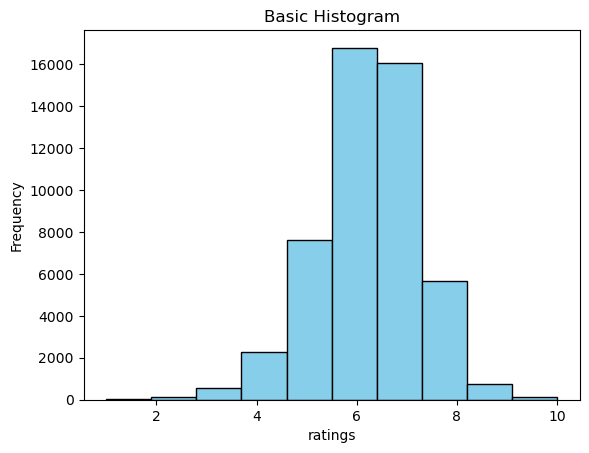

In [217]:
plt.hist(data_title_ratings["averageRating"],color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('ratings')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

In [218]:
#by performing a histogram for movie ratings , we can clearly see that most movie ratings where between 6 and 8 , 
#we can also see that only a few movies got the perfect score of 10 , or the horrible score of less than 3 

In [219]:
#lets create a Boxplots of movie ratings by genre, we will use the merged table 


<Axes: xlabel='averageRating', ylabel='genres'>

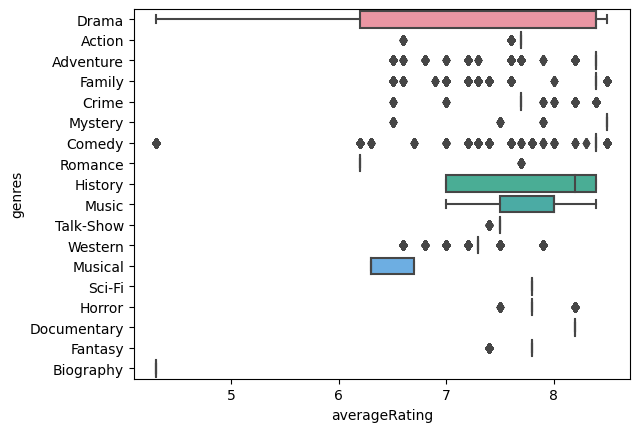

In [220]:


sns.boxplot(data=data_merged, x="averageRating", y="genres",)


In [221]:
#Perfect , we can see that the movies , drama , history , music , and musical have a large variation between the 
#25% of ratings and the 75% of ratings , more specificaly for the drama movies the 25% of ratings are 6 or less 
#and 75% of ratings are 8 or less , 
#we can see that movies of the category action , adventure , family , crime, mystery, comedy, romance
#talk show, western , sci fi , horror , documentury , fantasy , have a first quantile and a third one 
#identical , we can also see that they have outliers , but the movie category biography doesnt have outliers
#and the first quantiles are identical 

In [222]:
#lets have a look 
data_merged[data_merged["genres"]=='Biography']["averageRating"].describe()


count   192
mean      4
std       0
min       4
25%       4
50%       4
75%       4
max       4
Name: averageRating, dtype: float64

In [223]:
#yep as expected

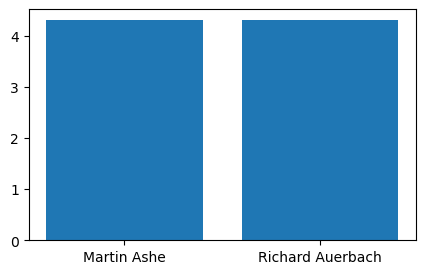

In [224]:
#lets have a look at the worst 2 professionals  and award them the Golden Raspberry
data_sort=data_merged.sort_values(by='averageRating',axis=0, ascending=True)
data_sort.head(60)
#is Richard Auerbach ,Martin Ashe , with a horrible average ratings as we can see on our boxplots of a little
#over 4 , they well deserve the golden raspberry and a new profession
name = data_sort['primaryName'].head(60)
rating = data_sort['averageRating'].head(60)
 
# Figure Size
fig = plt.figure(figsize =(5, 3))
 
# Horizontal Bar Plot
plt.bar(name[0:5], rating[0:5])
 
# Show Plot
plt.show()


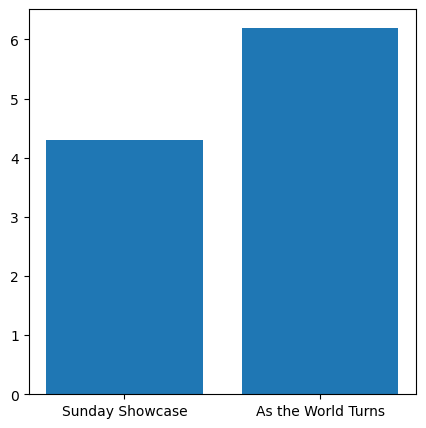

,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,Decade,nconst,primaryName,primaryProfession,knownForTitles,averageRating,numVotes,seasonNumber,episodeNumber,ordering,title,region,language
0,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,2,Kraft Television Theatre,DE,DE
1,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,3,Kraft Television Theatre,EC,EC
2,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,4,Kraft Television Theatre,ZA,en
3,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,5,Kraft Mystery Theatre,US,US
4,tvSeries,Kraft Theatre,0,1947,60,Drama,1940-1949,nm0018635,Millette Alexander,actress,tt0039123,8,219,8,1,6,Kraft Theatre,US,US


In [225]:
#lets have a look also at the two worst rated shows 

name = data_sort['primaryTitle']
rating = data_sort['averageRating']
 
# Figure Size
fig = plt.figure(figsize =(5, 5))
 
# Horizontal Bar Plot
plt.bar(name[0:5000], rating[0:5000])
 
# Show Plot
plt.show()
data_merged.head()
#we can see the two worst rated shows are the "sunday showcase " and "as the world turns" with ratings of 4.3 and 6 

<Axes: xlabel='startYear', ylabel='numVotes'>

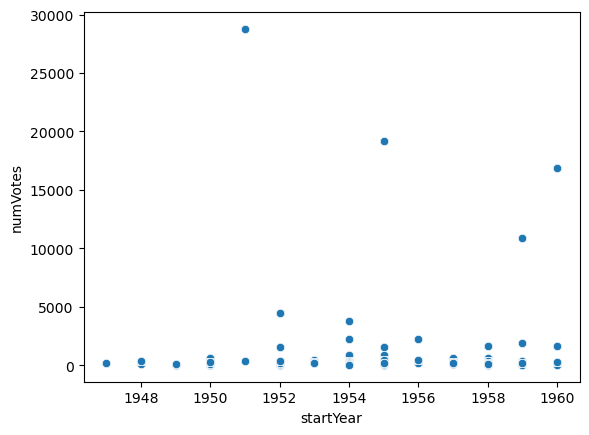

In [226]:
#lets Create a scatterplot of start years vs number of votes

sns.scatterplot(data=data_merged,x="startYear", y='numVotes')
#we can see that newer movies tend to have more votes

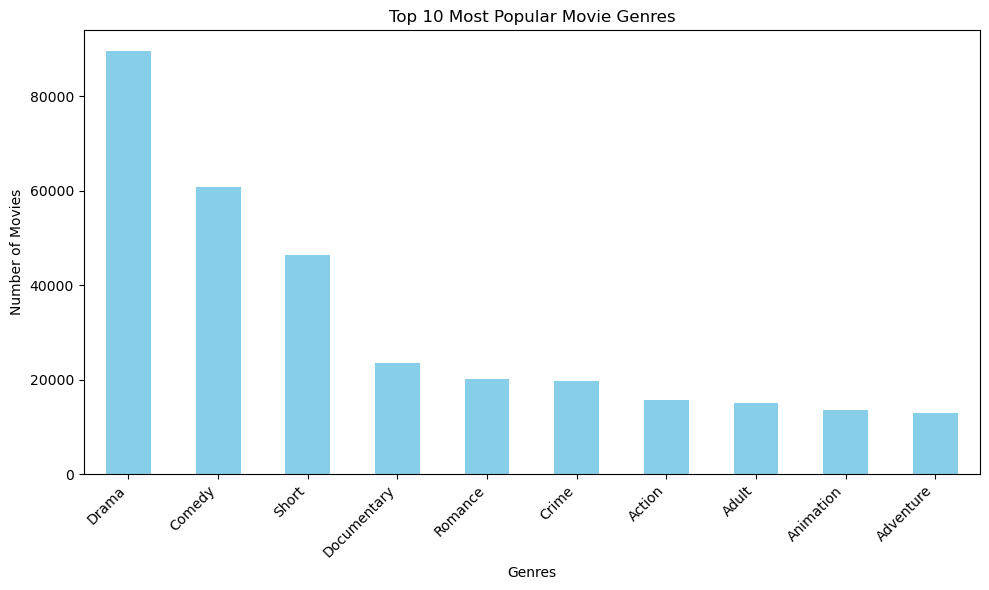

In [227]:

plt.figure(figsize=(10, 6))
popular_genres.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#perfect we can see that the first 3 most popular movie categories are drama,comedy,short

In [1]:
region_counts = data_title_akas['region'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Regions')
plt.axis('equal')
plt.show()
#we can see that the top 3 movie regions are  US,GB,BR

NameError: name 'data_title_akas' is not defined

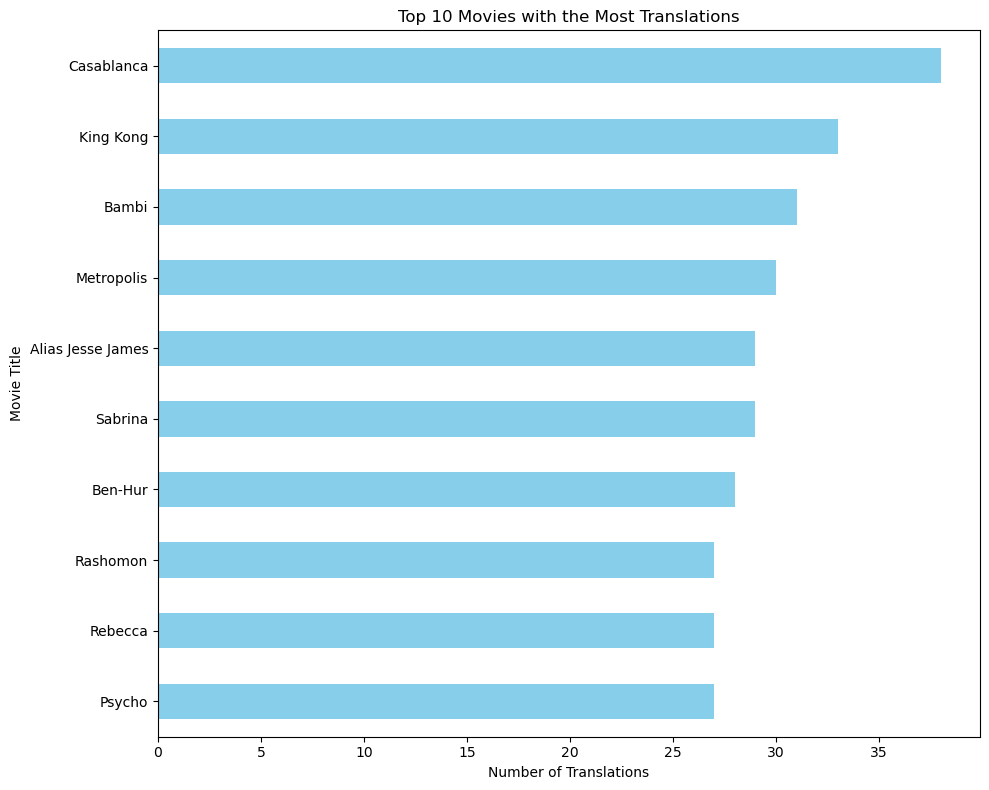

In [229]:
plt.figure(figsize=(10, 8))
sorted_movies_trans.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Movies with the Most Translations')
plt.xlabel('Number of Translations')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()
#we can see the top 10 movies with the most translations